# Logistic Regression Project Exercise

**GOAL: Create a Classification Model that can predict whether or not a person tests positive for diabetes based on samples taken from that person**


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

Pima Indians Diabetes Database

https://www.kaggle.com/competitions/diabetes-classification/overview

Number of Instances: 768

Columns Description:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 "negative test" or 1 "tested positive for diabetes")

----
**Read in the data.**

In [2]:
df = pd.read_csv('diabetes-classification.csv')

In [3]:
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


1. What is the youngest and oldest patient ? The mean age of patients ?

In [34]:
# Statistical summary
df.describe()['age'] # Trasnpose ?

count    614.000000
mean      33.325733
std       11.929569
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

**Create bar plot that shows the total counts per target label.**

In [6]:
# 0 "negative test" or 1 "tested positive for diabetes"
df['diabetes'].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

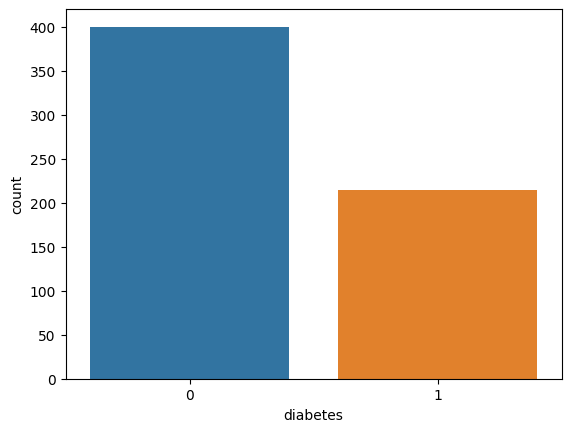

In [7]:
sns.countplot(x='diabetes',data=df)

**Create a pairplot that displays the relationships between the following columns:**

    ['no_times_pregnant', 'glucose_concentration', 'bmi', 'age', 'diabetes']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

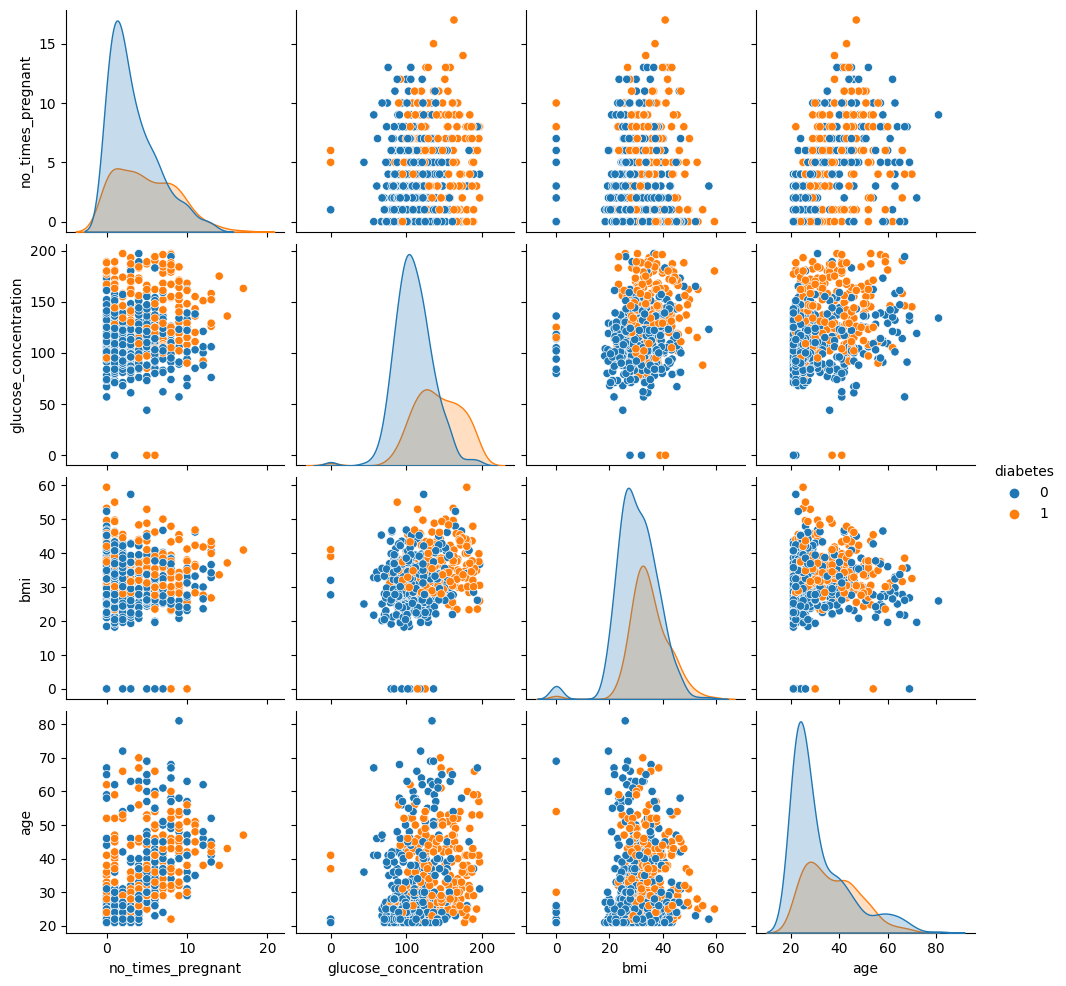

In [8]:
# Add hue=diabetes to add test results to scatter plot.
sns.pairplot(df[['no_times_pregnant', 'glucose_concentration', 'bmi', 'age', 'diabetes']], hue='diabetes')

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

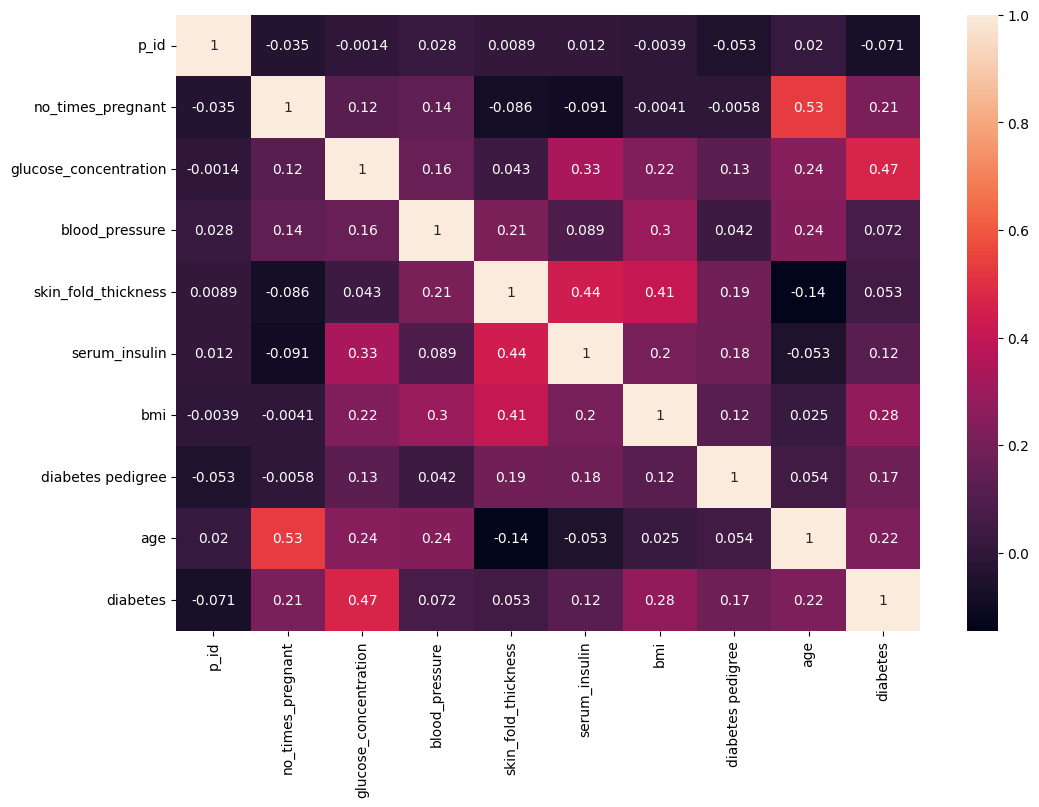

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [10]:
X = df.drop(['p_id', 'diabetes'],axis=1)
y = df['diabetes']

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Create a StandardScaler object and normalize the X train and test set feature data.**

**Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Create a Logistic Regression model** 

**Train and fit a logistic regression model on the training set.**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**Report back the model's coefficients.**

In [17]:
log_model.coef_

array([[ 0.41566495,  1.15392615, -0.26057397, -0.00796116, -0.201854  ,
         0.68553736,  0.27914243,  0.1648963 ]])

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the **odds** and can not be directly interpreted as in linear regression.

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret. Use np.exp()**

In [18]:
np.exp(log_model.coef_)

array([[1.51537806, 3.17061681, 0.77060916, 0.99207045, 0.81721423,
        1.98483811, 1.32199563, 1.17927082]])

### Coefficient Interpretation (bmi and glucose concentration)

This means:

* The odds for both Glucose Concentration (2nd column) and BMI (6th column) are **positive**, meaning that they are **positively associated** with having heart condition (**class 1**). 

* Let's focus on Glucose Concentration (2nd column). We can interpret this as follows. For a 1 unit increase in Glucose Concentration we expect the odds of having diabetes to increase by 3 times (324\%).

* On the other hand, as BMI (6th column) increases by 1 unit, the odds of having diabetes 2 times higher 201%.

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [20]:
y_pred = log_model.predict(scaled_X_test)

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "confusion_matrix.jpg")

In [22]:
confusion_matrix(y_test,y_pred)

array([[33,  4],
       [11, 14]], dtype=int64)

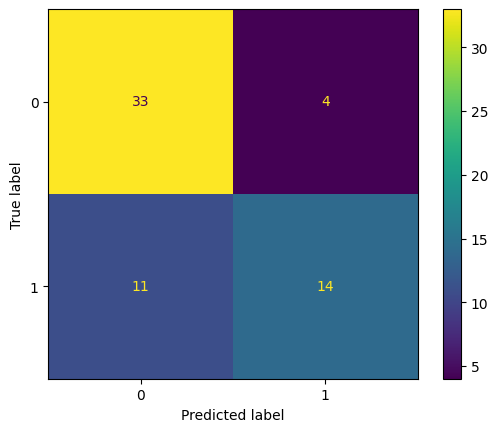

In [23]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        37
           1       0.78      0.56      0.65        25

    accuracy                           0.76        62
   macro avg       0.76      0.73      0.73        62
weighted avg       0.76      0.76      0.75        62



This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_test, y_pred)

0.7777777777777778

In [27]:
recall_score(y_test, y_pred)

0.56

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [28]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

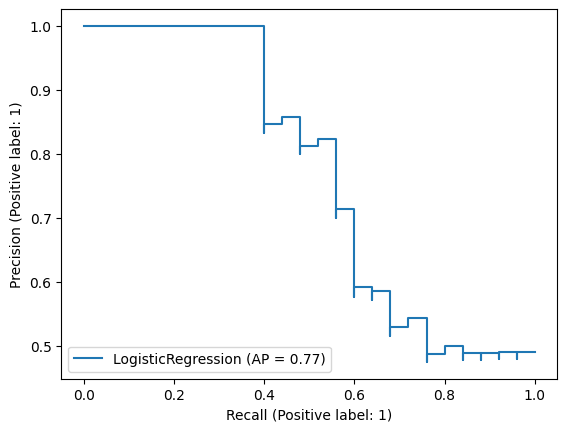

In [29]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

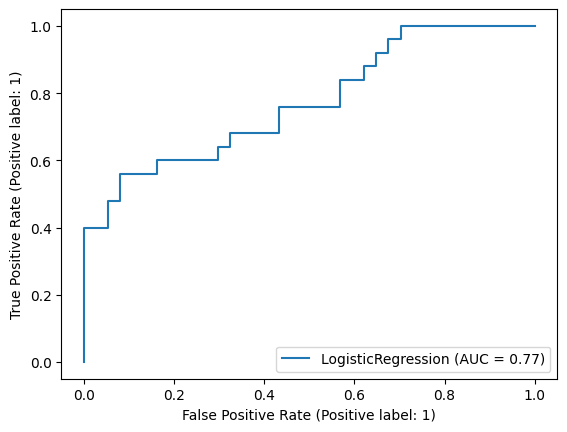

In [30]:
plot_roc_curve(log_model,scaled_X_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    no_times_pregnant          0
    glucose_concentration      126
    blood_pressure             64
    skin_fold_thickness        24
    serum_insulin              79
    bmi                        53.2
    diabetes pedigree          0.264
    age                        50

**What does your model predict for this patient? Do they have diabetes ? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [31]:
patient = [[0, 126, 64, 24, 79, 53.2, 0.264, 50]]

In [32]:
log_model.predict(patient)

array([1], dtype=int64)

In [33]:
log_model.predict_proba(patient)

array([[0., 1.]])

----

## Great Job!